In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 125
import seaborn as sns
from Bio import SeqIO, Seq
import scipy.stats as st
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import glob, os, sys, yaml, subprocess, itertools, sparse

who_variants_combined = pd.read_csv("who_confidence_2021.csv")
drug_gene_mapping = pd.read_csv("../data/drug_gene_mapping.csv")
samples_summary = pd.read_csv("../data/samples_summary.csv")
snp_scheme = pd.read_csv("../data/coll2014_SNP_scheme.tsv", sep="\t")
snp_scheme["#lineage"] = snp_scheme["#lineage"].str.replace("lineage", "")
snp_scheme.rename(columns={"#lineage": "Lineage"}, inplace=True)

lineages = pd.read_csv("../data/combined_lineages_samples.csv", low_memory=False)
solo_results = pd.read_csv("../results/SOLO_Final_Aug2023.csv", header=[1])
# solo_results = pd.read_excel("../results/SOLO primary_STATA_ver18Feb2023.xlsx", sheet_name=None)

# if len(solo_results) == 1:
#     solo_results = solo_results[list(solo_results.keys())[0]]
    
# solo_results = solo_results.rename(columns={"variant":"mutation"})
# solo_results["Initial_Confidence_Grading"] = solo_results["Initial_Confidence_Grading"].replace('4) Not assoc w R - interim', '4) Not assoc w R - Interim')
    
import warnings
warnings.filterwarnings(action='ignore')

# utils files are in a separate folder
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), "utils"))
from stats_utils import *
from data_utils import *

# CHANGE ANALYSIS DIR BEFORE RUNNING THE NOTEBOOK!
analysis_dir = '/n/data1/hms/dbmi/farhat/Sanjana/who-mutation-catalogue'
from functools import reduce

/tmp/ipykernel_25927/2387162336.py:21: DtypeWarning: Columns (36,37,99,100,102,103,106,108,112) have mixed types. Specify dtype option on import or set low_memory=False.
  solo_results = pd.read_csv("../results/SOLO_Final_Aug2023.csv", header=[1])


In [10]:
solo_results.query("drug=='Clofazimine'").loc[solo_results["FINAL CONFIDENCE GRADING"].isin(["2) Assoc w R - Interim", "1) Assoc w R"])].sort_values("FINAL CONFIDENCE GRADING", ascending=True)

,drug,gene,mutation,variant,tier,effect,genomic position,algorithm_pass,Present_SOLO_SR,Present_SOLO_R,...,Additional grading criteria applied,FINAL CONFIDENCE GRADING,Comment,CHANGES vs ver1,"Relaxed thresholds simulation (BDQ_Rv0678, CFZ_Rv0678, INH_katG, DLM_ddn/fbiA/fbiB/fbiC/fgd1/Rv2983)",Silent mutation,Listed in abridged tables,Additional grading,Footnote,CHANGES vs ver1.1
7730,Clofazimine,Rv0678,p.Glu49fs,Rv0678_p.Glu49fs,1,frameshift,NaN,1.0,40.0,20.0,...,NaN,1) Assoc w R,Can only confer resistance if genetically link...,UP from Uncertain to AwR,NaN,NaN,yes,NaN,E,4
7647,Clofazimine,Rv0678,LoF,Rv0678_LoF,1,LoF,NaN,1.0,164.0,64.0,...,NaN,1) Assoc w R,Can only confer resistance if genetically link...,New AwR,NaN,NaN,yes,NaN,E,5
7550,Clofazimine,pepQ,LoF,pepQ_LoF,1,LoF,NaN,1.0,3.0,1.0,...,BDQ-CFZ cross-resistance,2) Assoc w R - Interim,NaN,New AwRI,NaN,NaN,yes,BDQ-CFZ X-R,NaN,5
7727,Clofazimine,Rv0678,p.Glu138*,Rv0678_p.Glu138*,1,stop_gained,NaN,1.0,1.0,1.0,...,Indel frameshift or premature stop codon (LoF),2) Assoc w R - Interim,Can only confer resistance if genetically link...,New AwRI,NaN,NaN,no,NaN,E,5
7734,Clofazimine,Rv0678,p.Gly11fs,Rv0678_p.Gly11fs,1,frameshift,NaN,1.0,0.0,0.0,...,Indel frameshift or premature stop codon (LoF),2) Assoc w R - Interim,Can only confer resistance if genetically link...,UP from Uncertain to AwRI,NaN,NaN,no,NaN,E,4
7735,Clofazimine,Rv0678,p.Gly121Arg,Rv0678_p.Gly121Arg,1,missense_variant,NaN,1.0,5.0,4.0,...,Evidence from ALL dataset only,2) Assoc w R - Interim,Can only confer resistance if genetically link...,New AwRI,NaN,NaN,yes,ALL only,E,5
7739,Clofazimine,Rv0678,p.Gly41fs,Rv0678_p.Gly41fs,1,frameshift,NaN,1.0,0.0,0.0,...,Indel frameshift or premature stop codon (LoF),2) Assoc w R - Interim,Can only confer resistance if genetically link...,New AwRI,NaN,NaN,no,NaN,E,5
7746,Clofazimine,Rv0678,p.Ile16fs,Rv0678_p.Ile16fs,1,frameshift,NaN,1.0,1.0,1.0,...,Indel frameshift or premature stop codon (LoF),2) Assoc w R - Interim,Can only confer resistance if genetically link...,New AwRI,NaN,NaN,no,NaN,E,5
7747,Clofazimine,Rv0678,p.Ile67fs,Rv0678_p.Ile67fs,1,frameshift,NaN,1.0,26.0,9.0,...,Indel frameshift or premature stop codon (LoF),2) Assoc w R - Interim,Can only confer resistance if genetically link...,New AwRI,NaN,NaN,no,NaN,E,5
7749,Clofazimine,Rv0678,p.Ile67Ser,Rv0678_p.Ile67Ser,1,missense_variant,NaN,1.0,0.0,0.0,...,BDQ-CFZ cross-resistance,2) Assoc w R - Interim,Can only confer resistance if genetically link...,UP from Uncertain to AwRI,NaN,NaN,yes,BDQ-CFZ X-R,E,4


In [9]:
solo_results.query("drug=='Pretomanid'").loc[solo_results["FINAL CONFIDENCE GRADING"].isin(["2) Assoc w R - Interim", "1) Assoc w R"])].sort_values("FINAL CONFIDENCE GRADING", ascending=True)

,drug,gene,mutation,variant,tier,effect,genomic position,algorithm_pass,Present_SOLO_SR,Present_SOLO_R,...,Additional grading criteria applied,FINAL CONFIDENCE GRADING,Comment,CHANGES vs ver1,"Relaxed thresholds simulation (BDQ_Rv0678, CFZ_Rv0678, INH_katG, DLM_ddn/fbiA/fbiB/fbiC/fgd1/Rv2983)",Silent mutation,Listed in abridged tables,Additional grading,Footnote,CHANGES vs ver1.1


Anything Num_Isolates < 5 should be uncertain 

Tier 2 can only be in the highest categories if there is MIC evidence supporting it

Write an email to everybody about the results for the new drugs: BDQ, LZD, PTM, DLM, CFZ

Associations added to list only if they are both in WHO and ALL datasets. 

In [47]:
drugs_lst = os.listdir(analysis_dir)

drug_abbr_dict = {"Delamanid": "DLM",
                  "Bedaquiline": "BDQ",
                  "Clofazimine": "CFZ",
                  "Ethionamide": "ETA",
                  "Linezolid": "LZD",
                  "Moxifloxacin": "MXF",
                  "Capreomycin": "CAP",
                  "Amikacin": "AMI",
                  "Pretomanid": "PTM",
                  "Pyrazinamide": "PZA",
                  "Kanamycin": "KAN",
                  "Levofloxacin": "LEV",
                  "Streptomycin": "STM",
                  "Ethambutol": "EMB",
                  "Isoniazid": "INH",
                  "Rifampicin": "RIF"
                 }

# Write Final Dataframes for the Binary Analysis to an Excel File

Each drug will have a separate Excel file. Each file will have 16 sheets, one for each model.

For INH, surprising that hadA variants are found with high associations. Might be homoplastic!
For PZA, surprising that clpC1_c.2302T>C co-occurs with pncA_p.His57Asp

In [3]:
def get_unpooled_table_by_tier(drug, tiers_lst, folder, model_prefix):
    
    ################## 1. READ IN RIDGE REGRESSION RESULTS ##################
    model_permute = pd.read_csv(os.path.join(analysis_dir, drug, folder, model_prefix, "model_analysis.csv")).query("~mutation.str.contains('PC')")
    
    ################## 2. READ IN LRT RESULTS ##################
    LRTresults = pd.read_csv(os.path.join(analysis_dir, drug, folder, model_prefix, "LRT_results.csv"))

    # because the p-values are NaN for the FULL model row, they will be removed, so then the dataframes can be merged using inner
    LRTresults = add_pval_corrections(LRTresults.iloc[1:, ])

    # check that all mutations are represented in both the LRT results and regression model results
    assert len(set(model_permute["mutation"].values).symmetric_difference(LRTresults["mutation"].values)) == 0
    
    # combine results into a single dataframe for easy searching. REMOVE BONFERRONI AND COEFS
    combined_results = model_permute[model_permute.columns[~model_permute.columns.str.contains("|".join(["Bonferroni", "coef"]))]].merge(LRTresults[["mutation", "LRT_pval", "BH_LRT_pval", "LRT_neutral_pval", "BH_LRT_neutral_pval"]]
                                                                                                                  , on="mutation", how="inner")

    combined_results["Tier"] = tiers_lst[-1]

    # columns to return, in the desired order
    keep_cols = ['mutation', 'Tier', 'predicted_effect', 'position', 'confidence', 'Odds_Ratio',
                           #'OR_LB', 'OR_UB', 
                 'pval', 'BH_pval', 'neutral_pval', 'BH_neutral_pval', 'LRT_pval', 'BH_LRT_pval', 'LRT_neutral_pval', 'BH_LRT_neutral_pval']

    keep_cols += ['Num_Isolates', "Mut_R", "Mut_S", "NoMut_S", "NoMut_R", 
                  'PPV', 'NPV', 'Sens', 'Spec', 'LR+', 'LR-',
                   'PPV_LB', 'PPV_UB', 'NPV_LB', 'NPV_UB', 'Sens_LB', 'Sens_UB', 'Spec_LB',
                   'Spec_UB', 'LR+_LB', 'LR+_UB', 'LR-_LB', 'LR-_UB'
                   ]

    return combined_results[keep_cols]

In [4]:
def add_significance_category(df, drug, model_path):
    '''
    Add significance category annotations, in the form of integers. Add the ones with the fewest requirements first, and then progressively add
    '''
    
    col_name = "regression_confidence"
    df = df.reset_index(drop=True)
    df[["Tier", "synonymous"]] = df[["Tier", "synonymous"]].astype(int)
    
    # lower significance threshold for tier 2 genes and silent variants
    if len(df["Tier"].unique()) == 2 or "withSyn" in model_path:
        thresh = 0.01
    else:
        thresh = 0.05
        
    # relaxed thresholds for pncA
    df.loc[(df["mutation"].str.contains('pncA')) & (df["BH_pval"] < thresh) & (df["Odds_Ratio"] > 1) & (df["Mut_R"] >= 2) & (df["PPV"] >= 0.5), col_name] = "Possible Assoc w R"
    df.loc[(df["mutation"].str.contains('pncA')) & (df["BH_pval"] < thresh) & (df["Odds_Ratio"] < 1) & (df["Mut_R"] >= 2) & (df["NPV"] >= 0.5), col_name] = "Possible Assoc w S"

    # "regular" thresholds for non-pncA mutations
    # anything without Num_Isolates >= 5 is Uncertain because it's too rare to make conclusions
    df.loc[(~df["mutation"].str.contains('pncA')) & (df["BH_pval"] < thresh) & (df["Odds_Ratio"] > 1) & (df["Num_Isolates"] >= 5) & (df["PPV_LB"] >= 0.25), col_name] = "Possible Assoc w R"
    df.loc[(~df["mutation"].str.contains('pncA')) & (df["BH_pval"] < thresh) & (df["Odds_Ratio"] < 1) & (df["Num_Isolates"] >= 5) & (df["NPV_LB"] >= 0.25), col_name] = "Possible Assoc w S"
    
    # get additional evidence from the LRT to be classified as Assoc w R/S. Only classify Tier 1 here
    # Tier 2 mutations can only be upgraded to the highest categories if there is MIC evidence supporting it
    df.loc[(df[col_name] == "Possible Assoc w R") & (df["BH_LRT_pval"] < thresh) & (df["Tier"] == 1), col_name] = "Assoc w R"
    df.loc[(df[col_name] == "Possible Assoc w S") & (df["BH_LRT_pval"] < thresh) & (df["Tier"] == 1), col_name] = "Assoc w S"
    
    # phenos = ALL/WHO is the middle part of the path, so split and keep the first and last parts
    MIC_model_path = "/".join([model_path.split("/")[0], model_path.split("/")[-1]])
    MIC_model_analysis = pd.read_csv(os.path.join(analysis_dir, drug, "MIC", MIC_model_path, "model_analysis.csv")).query("~mutation.str.contains('PC')")
    
    # neutral mutations: not significant in regression AND significant in the neutral LRT test AND present at high enough frequency
    # should be in the lowest tail of the p-value.
    # so a mutation is significant in regression if p-value < 0.05, then a mutation is significant in the neutral test if p-value > 0.95
    # This means that more than 95% of permuted samples are NOT AS EXTREME as the test statistic, indicating the probably the test statistic is not significant
    df.loc[((df["BH_neutral_pval"] < thresh) | (df["BH_LRT_neutral_pval"] < thresh)) & (df["Num_Isolates"] >= 5), col_name] = "Neutral"
        
    # upgrade mutations in the Possible Assoc categories if they have a significant associations with MIC
    # downgrade mutations in the top categories if they DO NOT HAVE significant associations with MIC
    # AT THIS POINT, THE HIGHEST A TIER 2 MUTATION CAN BE IS AT POSSIBLE
    df = df.merge(MIC_model_analysis[["mutation", "coef", "BH_pval"]].rename(columns={"coef": "MIC_coef", "BH_pval": "BH_MIC_pval"}), on="mutation", how="left")
    mic_evidence_lst = []
    
    for i, row in df.iterrows():

        OR, OR_BH_pval, MIC_coef, BH_MIC_pval = row[["Odds_Ratio", "BH_pval", "MIC_coef", "BH_MIC_pval"]].values
        
        if not pd.isnull(MIC_coef) and not pd.isnull(row[col_name]):
                        
            if "Possible" in row[col_name] or row["Tier"] == 2:
                
                # only upgrade or downgrade if the MIC coefficient is significant
                # if it is not significant, then don't make any changes
                if BH_MIC_pval < thresh:

                    # keep track of mutations that we use MIC evidence for
                    mic_evidence_lst.append(row["mutation"])

                    # HANDLE POSSIBLE MUTATIONS: if MIC evidence agrees and is significant, upgrade
                    # if MIC evidence disagrees or is NOT significant, downgrade
                    if OR > 1:
                        if MIC_coef > 0:
                            df.loc[i, col_name] = "Assoc w R"
                        else:
                            df.loc[i, col_name] = "Uncertain"

                    elif OR < 1:
                        if MIC_coef < 0:
                            df.loc[i, col_name] = "Assoc w S"
                        else:
                            df.loc[i, col_name] = "Uncertain"
                            
    # all other are uncertain
    df[col_name] = df[col_name].fillna("Uncertain")
    df.loc[df["mutation"].isin(mic_evidence_lst), "Use_MIC_Evidence"] = 1
    df["Use_MIC_Evidence"] = df["Use_MIC_Evidence"].fillna(0).astype(int)
    return df

In [5]:
def add_single_lineage_annotations_to_model(drug, df, folder, model_path):
    '''
    Annotate mutations that are present in a single lineage. Basically just a flag when performing further analyses.
    
    It's done at the lowest level because that's the output of Coll2014. So it will not flag mutations that are all present in L2, unless L2 was the deepest category fast-lineage-caller identified.
    '''
    
    model_matrix = pd.read_pickle(os.path.join(analysis_dir, drug, folder, model_path, "model_matrix.pkl"))

    lineages_single_model = lineages.query("~Coll2014.str.contains(',')")
    model_matrix = model_matrix.loc[model_matrix.index.isin(lineages_single_model['Sample_ID'].values)]
    model_matrix = model_matrix.merge(lineages_single_model[["Coll2014", "Sample_ID"]], left_index=True, right_on="Sample_ID")
    
    single_lineage_mutations = {}

    for col in model_matrix.columns:

        if col not in ["Sample_ID", "Coll2014"]:

            mutation_lineages = np.unique(model_matrix.loc[model_matrix[col]==1]["Coll2014"].values)

            # there is only one lineage present
            if len(mutation_lineages) == 1:
                single_lineage_mutations[col] = mutation_lineages[0]
    
    # add lineage annotations to dataframe. Only mutations that are in the model matrix are in this dictionary
    df["single_lineage"] = df["mutation"].map(single_lineage_mutations)
    return df

In [6]:
def export_binary_analyses(drugs_lst, read_folder, write_folder, analyses_lst, pooled_model_variants=False):
    '''
    pooled_model_variants boolean indicates whether to get the statistics for the non-lof, non-inframe mutations from the unpooled models or the pooled models
    '''
    
    if not os.path.isdir(f"../results/{write_folder}"):
        os.mkdir(f"../results/{write_folder}")
    
    for drug in np.sort(drugs_lst):
        
        all_analyses = {}

        for i, model_path in enumerate(analyses_lst):
            # some may not be there. Usually this is Pretomanid because there are no tier 2 genes or WHO phenotypes
            if os.path.isfile(os.path.join(analysis_dir, drug, read_folder, model_path, "model_analysis.csv")):
                            
                tiers_lst = [["1", "2"] if "1+2" in model_path else ["1"]][0]
                phenos_name = ["ALL" if "phenos=ALL" in model_path else "WHO"][0]
                
                # if "dropAF_withSyn_unpooled" in model_path:
                phenos_name = ["ALL" if "ALL" in model_path else "WHO"][0]
                add_analysis = get_unpooled_table_by_tier(drug, tiers_lst, read_folder, model_path)
                
                add_analysis["pool_type"] = model_path.split("_")[-1]
                add_analysis["synonymous"] = int("withSyn" in model_path)
                
                add_analysis = add_analysis[add_analysis.columns[~add_analysis.columns.str.contains("|".join(["coef", "Bonferroni"]))]]
                add_analysis = add_significance_category(add_analysis, drug, model_path)

                # add annotation denoting whether a mutation is only present in a single lineage
                add_analysis = add_single_lineage_annotations_to_model(drug, add_analysis, read_folder, model_path)

                # exclude mutations that are already covered in earlier models
                exclude_mutations = []
                
                # for models with synonymous mutations, keep only the data for the synonymous ones
                # the data for nonsyn mutations will come from the noSyn models
                if "withSyn" in model_path:

                    # add_analysis = add_analysis.query("predicted_effect in ['synonymous_variant', 'stop_retained_variant', 'initiator_codon_variant']")
                    exclude_mutations += list(pd.read_pickle(os.path.join(analysis_dir, drug, read_folder, model_path.replace("withSyn", "noSyn"), "model_matrix.pkl")).columns)
                        
                # select which model to prioritize for mutations (non-LoF, non-inframe) tested in both the pooled and unpooled models
                # if pooled_model_variants = True, keep the stats from the pooled model. else, keep the stats from the unpooled model
                if pooled_model_variants:

                    # no pooled + synonymous models
                    if "unpooled" in model_path and "noSyn" in model_path:
                        exclude_mutations += list(pd.read_pickle(os.path.join(analysis_dir, drug, read_folder, model_path.replace("unpooled", "poolSeparate"), "model_matrix.pkl")).columns)
                else:
                    if "poolSeparate" in model_path:
                        # add_analysis = add_analysis.query("predicted_effect in ['lof', 'inframe']")
                        exclude_mutations += list(pd.read_pickle(os.path.join(analysis_dir, drug, read_folder, model_path.replace("poolSeparate", "unpooled"), "model_matrix.pkl")).columns)

                add_analysis = add_analysis.query("mutation not in @exclude_mutations")
                    
                # add SOLO V2 gradings
                # add_analysis = add_analysis.merge(solo_results.query("drug==@drug")[["mutation", "Initial_Confidence_Grading"]], on="mutation", how="left")

                # the phenotype category is only relevant for the binary analysis
                if read_folder == "BINARY":
                    add_analysis["Phenos"] = ["ALL" if "phenos=ALL" in model_path else "WHO"][0]

                add_analysis.rename(columns={"confidence": "confidence_V1",
                                             "Mut_R": "Present_R",
                                             "NoMut_R": "Absent_R",
                                             "Mut_S": "Present_S",
                                             "NoMut_S": "Absent_S"
                                            }, inplace=True)
                all_analyses[model_path.replace("phenos=", "").replace("/", ",").replace("tiers=", "T").replace("dropAF_", "")] = add_analysis

            # just for Linezolid because one of the pooled models doesn't exist (there are no variants to pool), so replace that entry with the corresponding unpooled model
            else:
                if "poolSeparate" in model_path:
                    if os.path.isfile(os.path.join(analysis_dir, drug, read_folder, model_path.replace("poolSeparate", "unpooled"), "model_analysis.csv")):
                        all_analyses[model_path.replace("phenos=", "").replace("/", ",").replace("tiers=", "T").replace("dropAF_", "")] = list(all_analyses.values())[i-1]
    
        with pd.ExcelWriter(f"../results/{write_folder}/{drug}.xlsx") as file:
            for key, val in all_analyses.items():
                val.to_excel(file, sheet_name=key, index=False)
                    
        print(f"Finished {len(all_analyses)} analyses for {drug}")
        # return all_analyses

In [32]:
# hard coded paths to preserve the model hierarchy
binary_analyses_lst = [
                        ########### Tier 1, WHO phenos ###########
                        "tiers=1/phenos=WHO/dropAF_noSyn_unpooled",
                        "tiers=1/phenos=WHO/dropAF_noSyn_poolSeparate",
                        "tiers=1/phenos=WHO/dropAF_withSyn_unpooled",
                        # ########### Tiers 1 + 2, WHO phenos ###########
                        # "tiers=1+2/phenos=WHO/dropAF_noSyn_unpooled",
                        # "tiers=1+2/phenos=WHO/dropAF_noSyn_poolSeparate",
                        # "tiers=1+2/phenos=WHO/dropAF_withSyn_unpooled",
                        ########### Tier 1, ALL phenos ###########
                        "tiers=1/phenos=ALL/dropAF_noSyn_unpooled",
                        "tiers=1/phenos=ALL/dropAF_noSyn_poolSeparate",
                        "tiers=1/phenos=ALL/dropAF_withSyn_unpooled",
                        # ########### Tiers 1 + 2, ALL phenos ###########
                        # "tiers=1+2/phenos=ALL/dropAF_noSyn_unpooled",
                        # "tiers=1+2/phenos=ALL/dropAF_noSyn_poolSeparate",
                        # "tiers=1+2/phenos=ALL/dropAF_withSyn_unpooled",
                      ]

# export_binary_analyses(drugs_lst, "BINARY", "BINARY_POOL", binary_analyses_lst, pooled_model_variants=True)
# export_binary_analyses(drugs_lst, "BINARY", "BINARY", binary_analyses_lst, pooled_model_variants=False)

In [156]:
drugs_use_mic = []

for drug in drugs_lst:

    results = pd.read_excel(f"../results/BINARY/{drug}.xlsx", sheet_name=None)

    for key, df in results.items():
        if len(df.query("Use_MIC_Evidence == 1")) > 0:
            drugs_use_mic.append(drug)
            break

print(len(drugs_use_mic))

7


In [157]:
mut_use_mic = {}

for drug in drugs_use_mic:

    mut_use_mic[drug] = []
    results = pd.read_excel(f"../results/BINARY/{drug}.xlsx", sheet_name=None)

    for key, df in results.items():
        pheno_category = df.Phenos.values[0]
        if len(df.query("Use_MIC_Evidence == 1")) > 0:
            muts_lst = list(df.query("Use_MIC_Evidence == 1").mutation.values)
            mut_use_mic[drug] += [f"{pheno_category}_{mut}" for mut in muts_lst]

In [159]:
pd.DataFrame.from_dict(mut_use_mic, orient='index').T

,Pyrazinamide,Amikacin,Ethambutol,Bedaquiline,Rifampicin,Isoniazid,Ethionamide
0,ALL_pncA_p.Glu15*,WHO_eis_p.Met1?,WHO_embB_c.2499G>A,WHO_Rv0678_p.Cys46Arg,ALL_rpoB_p.Val695Leu,WHO_inhA_c.-100C>A,WHO_ethA_p.His281Pro
1,ALL_pncA_c.3G>A,None,ALL_ubiA_p.Glu273Asp,WHO_Rv0678_p.Ile67Ser,None,ALL_katG_p.Phe167Cys,WHO_ethA_p.Trp256fs
2,None,None,ALL_embC_c.-900C>T,WHO_mmpL5_p.Thr794Ile,None,None,WHO_ethA_p.Thr321Pro
3,None,None,ALL_embB_c.3165C>A,WHO_Rv0678_p.Gln51fs,None,None,WHO_ethA_p.Leu225fs
4,None,None,ALL_embB_c.2499G>A,None,None,None,WHO_ethA_p.Tyr211Ser
5,None,None,None,None,None,None,WHO_ethA_p.Asp464fs
6,None,None,None,None,None,None,WHO_mshA_lof
7,None,None,None,None,None,None,ALL_inhA_c.-100C>A
8,None,None,None,None,None,None,ALL_inhA_c.9A>C


In [96]:
# def create_significance_summary_by_drug(drug, folder):
    
#     col_name = "regression_confidence"
#     drug_excel_file = pd.read_excel(f"../results/{folder}/{drug}.xlsx", sheet_name=None)
#     summary_df = pd.DataFrame()

#     # dropna drops PCs (because they are NaN in the univariate stats columns) and also the dropped mutations because they are NaN in most columns
#     for model in drug_excel_file.keys():
#         summary_df = pd.concat([summary_df, pd.DataFrame(drug_excel_file[model][col_name].value_counts(dropna=False))], axis=1)

#     summary_df = summary_df.fillna(0).astype(int)
#     summary_df.columns = drug_excel_file.keys()

#     sig_groups = ["Assoc w R", "Possible Assoc w R", "Uncertain", "Possible Assoc w S", "Assoc w S", "Neutral"]

#     missing_groups = list(set(sig_groups) - set(summary_df.index.values))
#     summary_df = pd.concat([summary_df, pd.DataFrame(0, index=missing_groups, columns=summary_df.columns)])

#     return summary_df.loc[sig_groups]

In [93]:
# full_results_dict = {}

# for drug in np.sort(drugs_use_mic):
#     _, full_results = create_significance_summary_by_drug(drug, "BINARY")
#     full_results_dict[drug] = full_results

In [14]:
def get_all_results_single_drug(drug, excel_dir):

    full_results_excel = pd.read_excel(f"../results/{excel_dir}/{drug}.xlsx", sheet_name=None)
    del_cols = ["Phenos", "pool_type", "synonymous", "confidence_V1", "pval", "neutral_pval", "LRT_pval", "LRT_neutral_pval"]
    
    WHO_combined = []
    ALL_combined = []

    for name, df in full_results_excel.items():

        df = df[df.columns[~df.columns.isin(del_cols)]]
        
        if "WHO" in name:
            WHO_combined.append(df)
        elif "ALL" in name:
            ALL_combined.append(df)
        else:
            print(name)

    if drug != "Pretomanid":
        assert len(WHO_combined) == len(ALL_combined)
        assert len(pd.concat(ALL_combined)) == len(pd.concat(ALL_combined).drop_duplicates("mutation"))
        ALL_combined = pd.concat(ALL_combined)

    # this fails for Linezolid because in the WHO models, there are no pooled mutations, so the unpooled and pooled models are the same
    # assert len(pd.concat(WHO_combined)) == len(pd.concat(WHO_combined).drop_duplicates("mutation"))
    WHO_combined = pd.concat(WHO_combined)
    
    return WHO_combined, ALL_combined

In [43]:
def clean_WHO_results_write_to_csv(drug, in_folder, out_folder, tiers_lst=[1]):

    WHO_results_single_drug, ALL_results_single_drug = get_all_results_single_drug(drug, in_folder)

    WHO_results_single_drug = pd.concat([WHO_results_single_drug[["mutation", "predicted_effect"]], 
                                        WHO_results_single_drug[cols_lst], 
                                        WHO_results_single_drug[['MIC_coef', 'BH_MIC_pval']]
                                       ], axis=1)

    # fix LoF naming
    WHO_results_single_drug["mutation"] = WHO_results_single_drug.mutation.str.replace("lof", "LoF")
    WHO_results_single_drug["predicted_effect"] = WHO_results_single_drug.predicted_effect.str.replace("lof", "LoF")

    # any mutations that were not in any regression model are added back in here as Uncertain with additional info in the Reason column
    missing_mut_df = solo_results.query("drug==@drug & tier in @tiers_lst & variant not in @WHO_results_single_drug.mutation.values")[['variant', 'effect']].rename(columns={'variant': 'mutation', 'effect': 'predicted_effect'})
    missing_mut_df['regression_confidence'] = 'Uncertain'
    missing_mut_df['Reason'] = 'NotGraded'

    save_df = pd.concat([WHO_results_single_drug, missing_mut_df], axis=0).rename(columns=dict(zip(cols_lst, [f"WHO_{col}" for col in cols_lst]))).sort_values("WHO_Odds_Ratio", ascending=False)

    # make this column so that it can be used like for all the other drugs. It's just a copy of WHO_regression_confidence because there is no ALL dataset
    save_df["regression_confidence"] = save_df["WHO_regression_confidence"]

    save_df.to_csv(f"../results/{out_folder}/{drug}.csv", index=False)

In [40]:
def combine_WHO_ALL_results_write_to_csv(drug, in_folder, out_folder, tiers_lst=[1]):

    WHO_results_single_drug, ALL_results_single_drug = get_all_results_single_drug(drug, in_folder)
    
    all_mutations = list(set(WHO_results_single_drug.mutation).union(set(ALL_results_single_drug.mutation)))

    R_interim_lst = []
    S_interim_lst = []
    uncertain_lst = []
    descriptions_lst = []
    
    for mutation in all_mutations:

        # if a mutation was not tested in a model, assign it to Ungraded for the purposes of combining results. It will still be NaN in the dataframe though
        if len(ALL_results_single_drug.query("mutation==@mutation")) == 0:
            ALL_conf = "Ungraded"
        else:
            ALL_conf = ALL_results_single_drug.query("mutation==@mutation")["regression_confidence"].values[0]

        if len(WHO_results_single_drug.query("mutation==@mutation")) == 0:
            WHO_conf = "Ungraded"
        else:
            WHO_conf = WHO_results_single_drug.query("mutation==@mutation")["regression_confidence"].values[0]        

        # because ALL is a bigger, more representative dataset, make interim if WHO = uncertain/neutral and ALL = assoc
        if WHO_conf in ["Uncertain", "Neutral", "Ungraded"]:
            if ALL_conf == 'Assoc w R':
                R_interim_lst.append(mutation)
            elif ALL_conf == 'Assoc w S':
                S_interim_lst.append(mutation)

        # if one confidence is Neutral and the other is Ungraded or Uncertain, make overall Uncertain
        if ALL_conf == "Neutral" and WHO_conf in ["Uncertain", "Ungraded"]:
            uncertain_lst.append(mutation)
        if WHO_conf == "Neutral" and ALL_conf in ["Uncertain", "Ungraded"]:
            uncertain_lst.append(mutation)

        if WHO_conf == "Possible Assoc w R":
            if ALL_conf == "Assoc w R":
                R_interim_lst.append(mutation)

        if WHO_conf == "Possible Assoc w S":
            if ALL_conf == "Assoc w S":
                S_interim_lst.append(mutation)

        if "Possible" in WHO_conf and "Possible" in ALL_conf:
            uncertain_lst.append(mutation)

        # even if WHO is assoc w R/S, if ALL is uncertain, keep uncertain because ALL is a bigger, more representative dataset
        if ALL_conf == "Uncertain":
            uncertain_lst.append(mutation)

        # if the two phenotypic categories disagree in the sign of the OR (and have significant ORs), make uncertain
        if "Assoc w R" in WHO_conf and "Assoc w S" in ALL_conf:
            uncertain_lst.append(mutation)

        if "Assoc w R" in ALL_conf and "Assoc w S" in WHO_conf:
            uncertain_lst.append(mutation)

    # check that the 3 up/downgrade lists are mutually exclusive (otherwise would indicate a bug)
    assert len(set(R_interim_lst).intersection(S_interim_lst)) == 0
    assert len(set(R_interim_lst).intersection(uncertain_lst)) == 0
    assert len(set(S_interim_lst).intersection(uncertain_lst)) == 0
    
    cols_lst = ['Odds_Ratio', 'BH_pval', 'BH_neutral_pval', 'BH_LRT_pval', 'BH_LRT_neutral_pval',
       'Num_Isolates', 'Present_R', 'Present_S', 'Absent_S', 'Absent_R', 'PPV',
       'NPV', 'Sens', 'Spec', 'PPV_LB', 'PPV_UB', 'NPV_LB',
       'NPV_UB', 'Sens_LB', 'Sens_UB', 'Spec_LB', 'Spec_UB', 'regression_confidence', 'single_lineage', 'Use_MIC_Evidence']
                
    WHO_final = WHO_results_single_drug
    WHO_final = pd.concat([WHO_final[["mutation", "predicted_effect"]], 
                           WHO_final[cols_lst], 
                           WHO_final[['MIC_coef', 'BH_MIC_pval']]
                          ], axis=1)
    WHO_final.rename(columns=dict(zip(cols_lst, [f"WHO_{col}" for col in cols_lst])), inplace=True)

    ALL_final = ALL_results_single_drug
    ALL_final = pd.concat([ALL_final[["mutation", "predicted_effect"]], 
                           ALL_final[cols_lst],
                           ALL_final[['MIC_coef', 'BH_MIC_pval']]
                          ], axis=1)
    ALL_final.rename(columns=dict(zip(cols_lst, [f"ALL_{col}" for col in cols_lst])), inplace=True)

    final_df = WHO_final.merge(ALL_final, on=["mutation", "predicted_effect", 'MIC_coef', 'BH_MIC_pval'], how="outer").drop_duplicates().reset_index(drop=True)
    
    # start with WHO confidences first, then make up- or downgrades depending on the ALL results
    final_df["regression_confidence"] = final_df["WHO_regression_confidence"].fillna(final_df["ALL_regression_confidence"])

    # upgrades to interim
    final_df.loc[final_df["mutation"].isin(R_interim_lst), "regression_confidence"] = "Assoc w R - Interim"
    final_df.loc[final_df["mutation"].isin(S_interim_lst), "regression_confidence"] = "Assoc w S - Interim"

    # downgrades to uncertain and all remaining possibles downgraded to uncertain
    final_df.loc[(final_df["mutation"].isin(uncertain_lst)) | (final_df["regression_confidence"].str.contains("Possible")), "regression_confidence"] = "Uncertain"

    # check that no mutations have been duplicated
    assert len(final_df.mutation.unique()) == len(final_df)

    # fix LoF naming
    final_df["mutation"] = final_df.mutation.str.replace("lof", "LoF")
    final_df["predicted_effect"] = final_df.predicted_effect.str.replace("lof", "LoF")

    # reorder columns so that the MIC columns are at the end
    final_df = final_df[np.concatenate([final_df.columns[~final_df.columns.str.contains('MIC')],  final_df.columns[final_df.columns.str.contains('MIC')]])]

    # any mutations that were not in any regression model are added back in here as Uncertain with additional info in the Reason column
    missing_mut_df = solo_results.query("drug==@drug & tier in @tiers_lst & variant not in @final_df.mutation.values")[['variant', 'effect']].rename(columns={'variant': 'mutation', 'effect': 'predicted_effect'})
    missing_mut_df['regression_confidence'] = 'Uncertain'
    missing_mut_df['Reason'] = 'NotGraded'
    
    return pd.concat([final_df, missing_mut_df], axis=0).sort_values("WHO_Odds_Ratio", ascending=False).to_csv(f"../results/{out_folder}/{drug}.csv", index=False)

In [41]:
def write_results_for_all_drugs(in_folder, out_folder, tiers_lst=[1]):

    cols_lst = ['Odds_Ratio', 'BH_pval', 'BH_neutral_pval', 'BH_LRT_pval', 'BH_LRT_neutral_pval',
    'Num_Isolates', 'Present_R', 'Present_S', 'Absent_S', 'Absent_R', 'PPV',
    'NPV', 'Sens', 'Spec', 'PPV_LB', 'PPV_UB', 'NPV_LB',
    'NPV_UB', 'Sens_LB', 'Sens_UB', 'Spec_LB', 'Spec_UB', 'regression_confidence', 'single_lineage']

    if not os.path.isdir(f"../results/{out_folder}"):
        os.mkdir(f"../results/{out_folder}")
    
    for drug in drugs_lst:
    
        if drug == "Pretomanid":
            clean_WHO_results_write_to_csv(drug, in_folder, out_folder, tiers_lst=[1])            
        else:
            combine_WHO_ALL_results_write_to_csv(drug, in_folder, out_folder, tiers_lst=[1])
    
        print(drug)

# Write Results for Pooled and Unpooled Models for All Drugs

In [224]:
write_results_for_all_drugs("BINARY", "FINAL", tiers_lst=[1])

Levofloxacin
Pyrazinamide
Streptomycin
Amikacin
Ethambutol
Clofazimine
Linezolid
Moxifloxacin
Kanamycin
Bedaquiline
Capreomycin
Rifampicin
Pretomanid
Delamanid
Isoniazid
Ethionamide


In [225]:
write_results_for_all_drugs("BINARY_POOL", "FINAL_POOL", tiers_lst=[1])

Levofloxacin
Pyrazinamide
Streptomycin
Amikacin
Ethambutol
Clofazimine
Linezolid
Moxifloxacin
Kanamycin
Bedaquiline
Capreomycin
Rifampicin
Pretomanid
Delamanid
Isoniazid
Ethionamide


# Compare Gradings between Pooled and Unpooled Models

In [44]:
def compare_pooled_unpooled_model_results(drug, include_silent=False):

    pooled_results = pd.read_csv(f"../results/FINAL_POOL/{drug}.csv")
    unpooled_results = pd.read_csv(f"../results/FINAL/{drug}.csv")

    if not include_silent:
        pooled_results = pooled_results.query("predicted_effect not in ['synonymous_variant', 'stop_retained_variant', 'initiator_codon_variant']")
        unpooled_results = unpooled_results.query("predicted_effect not in ['synonymous_variant', 'stop_retained_variant', 'initiator_codon_variant']")

    if len(set(unpooled_results.mutation).symmetric_difference(pooled_results.mutation)) > 0:
        print(f"Different non-LoF, non-inframe mutations for {drug}: {set(unpooled_results.mutation).symmetric_difference(pooled_results.mutation)})")
        
    combined_df = unpooled_results[["mutation", "regression_confidence"]].merge(pooled_results[["mutation", "regression_confidence"]], on="mutation", suffixes=["_unpooled", "_pooled"], how="outer")

    diff_df = combined_df.query("regression_confidence_unpooled != regression_confidence_pooled")

    # add solo gradings for comparison
    diff_df = diff_df.merge(solo_results.query("drug==@drug")[["variant", "FINAL CONFIDENCE GRADING"]].rename(columns={"variant": "mutation", "FINAL CONFIDENCE GRADING": "SOLO_FINAL_GRADING"}), how="left")

    # also remove cases where the results are Uncertain and Neutral because those aren't relevant for R prediction anyway
    return diff_df.query("~((regression_confidence_unpooled == 'Uncertain' & regression_confidence_pooled == 'Neutral') | (regression_confidence_unpooled == 'Neutral' & regression_confidence_pooled == 'Uncertain'))")

In [48]:
pooled_unpooled_differences = {}

for drug in drugs_lst:
    pooled_unpooled_differences[drug] = compare_pooled_unpooled_model_results(drug, include_silent=False)

for drug, df in pooled_unpooled_differences.items():
    if len(df) > 0:
        print(drug)

Pyrazinamide
Ethambutol
Kanamycin
Bedaquiline
Isoniazid
Ethionamide


In [49]:
pooled_unpooled_differences['Pyrazinamide'].sort_values("mutation", ascending=True)

,mutation,regression_confidence_unpooled,regression_confidence_pooled,SOLO_FINAL_GRADING
1,pncA_p.Val155Ala,Assoc w R,Uncertain,2) Assoc w R - Interim
0,pncA_p.Val93Ala,Assoc w R,Uncertain,2) Assoc w R - Interim


In [50]:
pooled_unpooled_differences['Ethambutol'].sort_values("mutation", ascending=True)

,mutation,regression_confidence_unpooled,regression_confidence_pooled,SOLO_FINAL_GRADING
0,ubiA_p.Ala237Val,Uncertain,Assoc w R - Interim,3) Uncertain significance


In [52]:
pooled_unpooled_differences['Kanamycin'].sort_values("mutation", ascending=True)

,mutation,regression_confidence_unpooled,regression_confidence_pooled,SOLO_FINAL_GRADING
0,whiB7_p.Leu42Pro,Assoc w S - Interim,Uncertain,3) Uncertain significance


In [53]:
pooled_unpooled_differences['Bedaquiline'].sort_values("mutation", ascending=True)

,mutation,regression_confidence_unpooled,regression_confidence_pooled,SOLO_FINAL_GRADING
0,Rv0678_p.Asn70Asp,Assoc w R - Interim,Assoc w R,2) Assoc w R - Interim


In [54]:
pooled_unpooled_differences['Isoniazid'].sort_values("mutation", ascending=True)

,mutation,regression_confidence_unpooled,regression_confidence_pooled,SOLO_FINAL_GRADING
0,ahpC_c.-48G>A,Assoc w R,Assoc w R - Interim,3) Uncertain significance
1,ahpC_c.-54C>T,Assoc w R,Assoc w R - Interim,3) Uncertain significance
3,ahpC_c.-72C>T,Assoc w R - Interim,Assoc w R,3) Uncertain significance
2,katG_p.Gln525Pro,Assoc w R,Assoc w R - Interim,3) Uncertain significance
6,katG_p.Ser140Asn,Uncertain,Assoc w S,3) Uncertain significance


In [55]:
pooled_unpooled_differences['Ethionamide'].sort_values("mutation", ascending=True)

,mutation,regression_confidence_unpooled,regression_confidence_pooled,SOLO_FINAL_GRADING
2,ethA_p.Cys403Trp,Assoc w R - Interim,Uncertain,3) Uncertain significance
4,ethA_p.Ile337Val,Uncertain,Assoc w S - Interim,3) Uncertain significance
0,inhA_c.-770T>C,Assoc w R,Assoc w R - Interim,2) Assoc w R - Interim
1,inhA_c.-796C>T,Uncertain,Assoc w R,3) Uncertain significance
3,inhA_p.Val78Ala,Uncertain,Assoc w S - Interim,3) Uncertain significance


In [58]:
drug = "Linezolid"
pooled_results = pd.read_csv(f"../results/FINAL_POOL/{drug}.csv")
unpooled_results = pd.read_csv(f"../results/FINAL/{drug}.csv")

# search_lst = pooled_unpooled_differences[drug].mutation.values
search_lst = ["rplC_p.Cys154Arg", "rrl_n.2270G>T", "rrl_n.2814G>T"]

unpooled_results.query("mutation in @search_lst")[["mutation", "WHO_regression_confidence", 'WHO_Use_MIC_Evidence', "ALL_regression_confidence", 'ALL_Use_MIC_Evidence', 'regression_confidence']].sort_values("mutation", ascending=True)

,mutation,WHO_regression_confidence,WHO_Use_MIC_Evidence,ALL_regression_confidence,ALL_Use_MIC_Evidence,regression_confidence
0,rplC_p.Cys154Arg,Assoc w R,0.0,Assoc w R,0.0,Assoc w R
2,rrl_n.2270G>T,Assoc w R,0.0,Assoc w R,0.0,Assoc w R
1,rrl_n.2814G>T,Assoc w R,0.0,Assoc w R,0.0,Assoc w R


# Heatmaps of the Numbers of Mutations in Each Category, Comparison with SOLO Top Category

In [179]:
def get_single_drug_data_for_heatmap(drug, folder="FINAL"):
        
    df = pd.read_csv(f"../results/{folder}/{drug}.csv")
    
    # create dictionary mapping groups to numbers to rank them. Because each mutation may have different gradings in the WHO vs. ALL datasets, keep the highest grading
    conf_rank_dict = dict(zip(['Uncertain', 'Assoc w R', 'Assoc w R - Interim', 'Assoc w S', 'Neutral', 'Assoc w S - Interim'],
                               np.arange(6) + 1
                             ))
    
    df["regression_conf_rank"] = df["regression_confidence"].map(conf_rank_dict)
    df = df.sort_values("regression_conf_rank", ascending=True).drop_duplicates("mutation", keep="first")
    del df["regression_conf_rank"]
    df = pd.DataFrame(df["regression_confidence"].value_counts()).reset_index()

    for group in conf_rank_dict.keys():
        if group not in df.regression_confidence.unique():
            df = pd.concat([df, pd.DataFrame({"regression_confidence": group, "count": 0}, index=[0])])

    df["Drug"] = drug
    return df



def plot_overall_counts_heatmap(folder="FINAL", drug_order=None, include_uncertain=False, saveName=None):

    if drug_order is None:
        drug_order = os.listdir(analysis_dir)
        
    df_heatmap = []

    for drug in drug_order:
        if os.path.isfile(f"../results/{folder}/{drug}.csv"):
            df_heatmap.append(get_single_drug_data_for_heatmap(drug, folder))
        else:
            if drug in drug_order:
                drug_order.remove(drug)

    df_heatmap = pd.concat(df_heatmap, axis=0)
    df_heatmap = df_heatmap.pivot(index="regression_confidence", columns="Drug", values="count").fillna(0)
    
    if include_uncertain:
        group_order = ['Assoc w R', 'Assoc w R - Interim', "Neutral", 'Assoc w S - Interim', 'Assoc w S', "Uncertain"]
    else:
        group_order = ['Assoc w R', 'Assoc w R - Interim', "Neutral", 'Assoc w S - Interim', 'Assoc w S']

    return df_heatmap.loc[group_order, drug_order]

In [206]:
solo_counts = []

for drug in drugs_lst:
    high_conf_muts = solo_results.query("drug==@drug").loc[solo_results["FINAL CONFIDENCE GRADING"] == '1) Assoc w R']
    solo_counts.append(len(high_conf_muts))

plot_df = plot_overall_counts_heatmap(folder="FINAL", 
                                      drug_order=['Rifampicin', 'Isoniazid', 'Ethambutol', 'Pyrazinamide', 'Ethionamide', 'Levofloxacin', 'Moxifloxacin', 'Kanamycin', 'Amikacin', 'Capreomycin', 'Streptomycin', 'Bedaquiline', 'Clofazimine', 'Linezolid', 'Delamanid', 'Pretomanid'], 
                                      include_uncertain=False, saveName=None
                                     )

plot_df = pd.concat([pd.DataFrame(np.array(solo_counts).reshape(-1, 1).T, columns=plot_df.columns, index=["SOLO Final Assoc w R"]), plot_df,])
plot_df.columns = [drug_abbr_dict[drug] for drug in plot_df.columns]

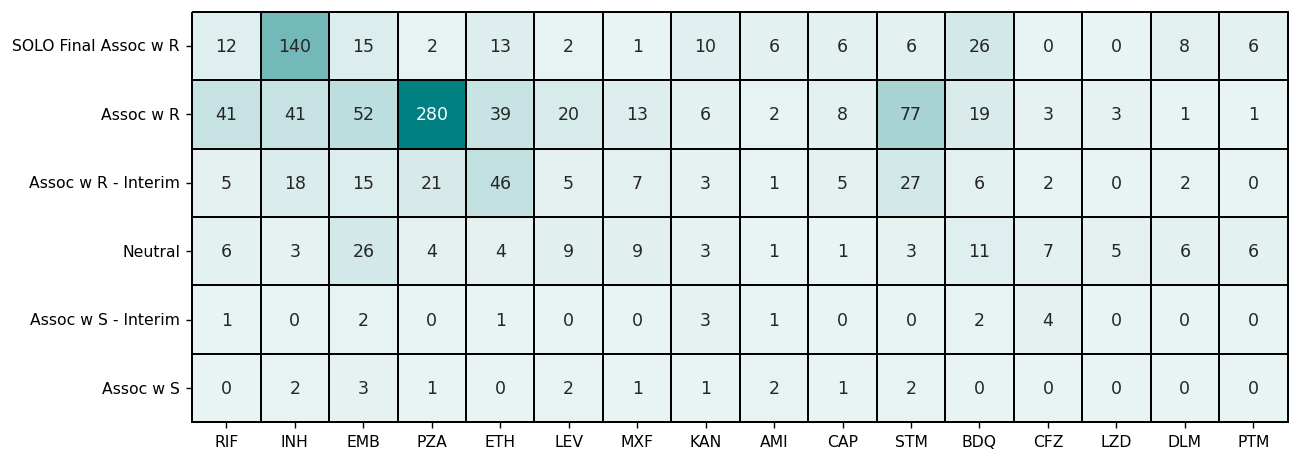

In [207]:
plot_width = 12
fig, ax = plt.subplots(figsize=(plot_width-1.5, plot_width+2.5))

sns.heatmap(
            data=plot_df,
            cmap=sns.light_palette("teal", as_cmap=True),
            vmin=0,
            # vmax=1,
            cbar=False,
            square=True,
            annot=True,
            annot_kws={"size": 10},
            fmt='g',
            linewidths=0.25, 
            linecolor='black',
            ax=ax,
            clip_on=False
           )

label_size = 9
plt.xticks(fontsize=label_size, rotation=0)
plt.yticks(fontsize=label_size, rotation=0)
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()
#plt.savefig("../results/20230727_prelim_heatmap_counts_with_SOLO", dpi=300)

In [219]:
df = pd.read_csv("../results/FINAL/Bedaquiline.csv")
df.query("regression_confidence=='Neutral'")

,mutation,predicted_effect,WHO_Odds_Ratio,WHO_BH_pval,WHO_BH_neutral_pval,WHO_BH_LRT_pval,WHO_BH_LRT_neutral_pval,WHO_Num_Isolates,WHO_Present_R,WHO_Present_S,...,ALL_Spec_LB,ALL_Spec_UB,ALL_regression_confidence,ALL_single_lineage,regression_confidence,WHO_Use_MIC_Evidence,MIC_coef,BH_MIC_pval,ALL_Use_MIC_Evidence,Reason
106,mmpL5_c.1065G>T,synonymous_variant,1.058062,0.1976,1.0,1.0,0.0,27.0,23.0,4.0,...,0.984195,0.988271,Neutral,4.4.1.1,Neutral,0.0,0.002563,0.504,0.0,NaN


In [211]:
solo_results.query("variant in ['mmpL5_p.Ser894*', 'mmpL5_p.Thr918fs']")

,drug,gene,mutation,variant,tier,effect,genomic position,algorithm_pass,Present_SOLO_SR,Present_SOLO_R,...,Additional grading criteria applied,FINAL CONFIDENCE GRADING,Comment,CHANGES vs ver1,"Relaxed thresholds simulation (BDQ_Rv0678, CFZ_Rv0678, INH_katG, DLM_ddn/fbiA/fbiB/fbiC/fgd1/Rv2983)",Silent mutation,Listed in abridged tables,Additional grading,Footnote,CHANGES vs ver1.1
2659,Bedaquiline,mmpL5,p.Ser894*,mmpL5_p.Ser894*,1,stop_gained,NaN,1.0,5.0,0.0,...,NaN,3) Uncertain significance,Abrogates effect of genetically linked AwR and...,No change,NaN,NaN,no,NaN,D,1
2669,Bedaquiline,mmpL5,p.Thr918fs,mmpL5_p.Thr918fs,1,frameshift,NaN,1.0,5.0,0.0,...,NaN,3) Uncertain significance,Abrogates effect of genetically linked AwR and...,No change,NaN,NaN,no,NaN,D,1
7352,Clofazimine,mmpL5,p.Ser894*,mmpL5_p.Ser894*,1,stop_gained,NaN,1.0,5.0,0.0,...,NaN,3) Uncertain significance,Abrogates effect of genetically linked AwR and...,No change,NaN,NaN,no,NaN,D,1
7363,Clofazimine,mmpL5,p.Thr918fs,mmpL5_p.Thr918fs,1,frameshift,NaN,1.0,5.0,0.0,...,NaN,3) Uncertain significance,Abrogates effect of genetically linked AwR and...,No change,NaN,NaN,no,NaN,D,1


In [105]:
compens_lst = ['c.-47_-46insT', 'c.-48G>A', 'c.-51G>A', 'c.-81C>T', 'c.-76T>A', 'c.-57C>T', 'c.-52C>T', 'c.-52C>A', 'c.-88_-87insAT', 'c.-77T>G', 'c.-72C>T', 'c.-54C>T', 'c.-74G>A', ]
compens_lst = ["ahpC_" + val for val in compens_lst]

# 'c.-42T>C' not in dataset, but 'c.-42T>G' is
neutral_lst = ['c.-88G>A', 'c.-46G>A', 'c.-84T>C', 'c.-42T>C', 'c.-42T>G', 'c.-88G>A', 'c.-10G>A', 'c.33G>A']
neutral_lst = ["ahpC_" + val for val in neutral_lst]

In [107]:
df.query("mutation in @compens_lst").sort_values(by="regression_confidence")[["mutation", "PPV_LB", "Initial_Confidence_Grading", "regression_confidence"]]

,mutation,PPV_LB,Initial_Confidence_Grading,regression_confidence
1130,ahpC_c.-57C>T,0.857459,3) Uncertain significance,Assoc w R - strict
1131,ahpC_c.-48G>A,0.869107,3) Uncertain significance,Assoc w R - strict
1133,ahpC_c.-52C>T,0.830272,3) Uncertain significance,Assoc w R - strict
1134,ahpC_c.-54C>T,0.824608,3) Uncertain significance,Assoc w R - strict
1140,ahpC_c.-76T>A,0.810294,3) Uncertain significance,Assoc w R - strict
1148,ahpC_c.-72C>T,0.763363,3) Uncertain significance,Assoc w R - strict
1146,ahpC_c.-47_-46insT,0.953808,3) Uncertain significance,Possible Assoc w R
1153,ahpC_c.-52C>A,0.883797,3) Uncertain significance,Possible Assoc w R
1163,ahpC_c.-51G>A,0.727041,3) Uncertain significance,Possible Assoc w R
1250,ahpC_c.-81C>T,0.750196,3) Uncertain significance,Possible Assoc w R


In [131]:
a = np.load("../data/pca_explained_var_ratio.npy")

In [137]:
np.sum(a[:5]), np.sum(a[:10]), np.sum(a[:50])

(0.8125600011651415, 0.9157450438061712, 0.999048108689211)

In [127]:
for drug in drugs_lst:

    if drug not in ["Rifampicin", "Isoniazid"]:
        df_phenos = pd.read_csv(os.path.join(analysis_dir, drug, "phenos_binary.csv"))
        for path in ["tiers=1+2/phenos=ALL/dropAF_withSyn_unpooled"]:
            if os.path.isfile(os.path.join(analysis_dir, drug, "BINARY", path, "model_matrix.pkl")):
                model_matrix = pd.read_pickle(os.path.join(analysis_dir, drug, "BINARY", path, "model_matrix.pkl"))
                #print(drug, len(df_phenos.sample_id.unique()), len(model_matrix),  len(df_phenos.sample_id.unique()) - len(model_matrix))
                print(drug, model_matrix.shape[1])

Moxifloxacin 2553
Levofloxacin 2885
Bedaquiline 1451
Delamanid 937
Clofazimine 1874
Linezolid 521


In [129]:
drug = "Pretomanid"
for path in ["tiers=1/phenos=ALL/dropAF_withSyn_unpooled"]:
    if os.path.isfile(os.path.join(analysis_dir, drug, "BINARY", path, "model_matrix.pkl")):
        model_matrix = pd.read_pickle(os.path.join(analysis_dir, drug, "BINARY", path, "model_matrix.pkl"))
        #print(drug, len(df_phenos.sample_id.unique()), len(model_matrix),  len(df_phenos.sample_id.unique()) - len(model_matrix))
        print(drug, model_matrix.shape[1])

Pretomanid 87


In [117]:
tiers_lst = ["1", "2"]

for drug in drugs_lst:

    if drug not in ["Isoniazid", "Rifampicin", "Levofloxacin", "Moxifloxacin", "Pretomanid"]:
        df_genos = pd.concat([pd.read_csv(os.path.join(analysis_dir, drug, f"genos_{num}.csv.gz"), compression="gzip", usecols=["resolved_symbol", "variant_category"]) for num in tiers_lst], axis=0).drop_duplicates()
        df_genos["mutation"] = df_genos["resolved_symbol"] + "_" + df_genos["variant_category"]
        print(drug, len(df_genos.mutation.unique()))

Bedaquiline 1904
Delamanid 953
Clofazimine 2405
Linezolid 1408


In [122]:
df_genos_PTM = pd.read_csv(os.path.join(analysis_dir, "Pretomanid", "genos_1.csv.gz"), compression="gzip", usecols=["resolved_symbol", "variant_category"]).drop_duplicates()
df_genos_PTM["mutation"] = df_genos_PTM["resolved_symbol"] + "_" + df_genos_PTM["variant_category"]
len(df_genos_PTM.mutation.unique())

95

In [140]:
df.query("mutation.str.contains('ahpC') & predicted_effect == 'missense_variant' & regression_confidence == 'Assoc w R - strict'")

,mutation,Tier,predicted_effect,position,Odds_Ratio,BH_pval,BH_neutral_pval,BH_LRT_pval,BH_LRT_neutral_pval,Num_Isolates,...,LR+_LB,LR+_UB,LR-_LB,LR-_UB,regression_confidence,MIC_coef,BH_MIC_pval,single_lineage,Initial_Confidence_Grading,Phenos
1135,ahpC_p.Asp73His,1,missense_variant,2726409,1.131113,0.0,1.0,0.001825,1.0,74,...,9.990215,100.666661,0.995855,0.997473,Assoc w R - strict,0.056271,0.246126,4.1.1.3,3) Uncertain significance,ALL


In [128]:
tiers_lst = ["1", "2"]

for drug in drugs_lst:

    if drug in ["Moxifloxacin", "Levofloxacin"]:
        df_genos = pd.concat([pd.read_csv(os.path.join(analysis_dir, drug, f"genos_{num}.csv.gz"), compression="gzip", usecols=["resolved_symbol", "variant_category"]) for num in tiers_lst], axis=0).drop_duplicates()
        df_genos["mutation"] = df_genos["resolved_symbol"] + "_" + df_genos["variant_category"]
        print(drug, len(df_genos.mutation.unique()))

Moxifloxacin 4022
Levofloxacin 4395


In [91]:
df.query("mutation in @neutral_lst")

,mutation,Tier,predicted_effect,position,Odds_Ratio,BH_pval,BH_neutral_pval,BH_LRT_pval,BH_LRT_neutral_pval,Num_Isolates,...,LR+_LB,LR+_UB,LR-_LB,LR-_UB,regression_confidence,MIC_coef,BH_MIC_pval,single_lineage,Initial_Confidence_Grading,Phenos
1908,ahpC_c.-42T>G,1,upstream_gene_variant,2726151,1.007108,0.591945,0.050110,1.0,0.000000,1,...,NaN,inf,0.999856,1.000047,Uncertain,NaN,NaN,4.9,3) Uncertain significance,ALL
2552,ahpC_c.-84T>C,1,upstream_gene_variant,2726109,0.985131,0.591945,0.865857,1.0,0.500654,2,...,0.000000,NaN,0.999972,1.000173,Uncertain,NaN,NaN,3,3) Uncertain significance,ALL
2581,ahpC_c.-10G>A,1,upstream_gene_variant,2726183,0.984156,0.591945,0.865857,1.0,0.539933,2,...,0.000000,NaN,0.999972,1.000173,Uncertain,NaN,NaN,5,3) Uncertain significance,ALL
2709,ahpC_c.-88G>A,1,upstream_gene_variant,2726105,0.964453,0.433937,1.000000,1.0,0.000000,5405,...,0.470984,0.528052,1.076785,1.090038,Uncertain,0.027747,0.528859,NaN,5) Not assoc w R,ALL


In [92]:
df.query("mutation in ['ahpC_c.-42T>G', 'ahpC_c.-84T>C', 'ahpC_c.-10G>A', 'ahpC_c.-88G>A']")[["mutation", "Odds_Ratio", "BH_neutral_pval", "BH_LRT_neutral_pval", "Num_Isolates", "Initial_Confidence_Grading", "regression_confidence"]].sort_values("mutation", ascending=False)

,mutation,Odds_Ratio,BH_neutral_pval,BH_LRT_neutral_pval,Num_Isolates,Initial_Confidence_Grading,regression_confidence
2709,ahpC_c.-88G>A,0.964453,1.000000,0.000000,5405,5) Not assoc w R,Uncertain
2552,ahpC_c.-84T>C,0.985131,0.865857,0.500654,2,3) Uncertain significance,Uncertain
1908,ahpC_c.-42T>G,1.007108,0.050110,0.000000,1,3) Uncertain significance,Uncertain
2581,ahpC_c.-10G>A,0.984156,0.865857,0.539933,2,3) Uncertain significance,Uncertain


In [88]:
df.query("Tier==1 & Initial_Confidence_Grading=='5) Not assoc w R' & predicted_effect=='synonymous_variant'")

,mutation,Tier,predicted_effect,position,Odds_Ratio,BH_pval,BH_neutral_pval,BH_LRT_pval,BH_LRT_neutral_pval,Num_Isolates,...,LR+_LB,LR+_UB,LR-_LB,LR-_UB,regression_confidence,MIC_coef,BH_MIC_pval,single_lineage,Initial_Confidence_Grading,Phenos
2739,katG_c.723C>G,1,synonymous_variant,2155389,1.073730,0.000000,1.000000,0.559319,0.998778,199,...,1.278354,2.234261,0.996590,0.998997,Possible Assoc w R,0.033688,0.529668,4.6.2.2,5) Not assoc w R,ALL
2740,katG_c.87C>A,1,synonymous_variant,2156025,1.043859,0.291896,1.000000,1.000000,0.554209,207,...,0.051222,0.157373,1.005386,1.007500,Uncertain,0.069702,0.342095,BOV_AFRI,5) Not assoc w R,ALL
2852,katG_c.609C>T,1,synonymous_variant,2155503,0.995089,0.605640,0.299108,1.000000,0.000000,338,...,0.053652,0.132351,1.009317,1.012031,Uncertain,0.024597,0.529668,NaN,5) Not assoc w R,ALL
3099,ahpC_c.186T>A,1,synonymous_variant,2726378,0.971048,0.605640,0.522968,1.000000,0.364614,54,...,0.000000,NaN,1.001437,1.002484,Uncertain,-0.005157,0.529668,NaN,5) Not assoc w R,ALL
3107,inhA_c.9A>C,1,synonymous_variant,1674210,0.947079,0.000000,1.000000,0.598440,0.998778,364,...,0.403466,0.638396,1.003249,1.006265,Possible Assoc w S,-0.075590,0.064143,2.2.1,5) Not assoc w R,ALL


In [66]:
df.query("regression_confidence=='Neutral'")

,mutation,Tier,predicted_effect,position,Odds_Ratio,BH_pval,BH_neutral_pval,BH_LRT_pval,BH_LRT_neutral_pval,Num_Isolates,...,LR+_LB,LR+_UB,LR-_LB,LR-_UB,regression_confidence,MIC_coef,BH_MIC_pval,single_lineage,Initial_Confidence_Grading,Phenos
397,Rv1129c_c.936G>A,2,synonymous_variant,1253599,0.997793,0.661948,0.0,1.0,0.0,6,...,0.000000,NaN,1.000058,1.000527,Neutral,-0.008863,0.531648,BOV_AFRI,3) Uncertain significance,WHO
553,dnaA_c.1302C>T,2,synonymous_variant,1302,0.992836,0.661948,0.0,1.0,0.0,6,...,0.983573,72.043402,0.999267,1.000011,Neutral,-0.004670,0.531648,4.3.3,3) Uncertain significance,WHO


In [73]:
df.query("mutation in ['ahpC_c.-42T>G', 'ahpC_c.-84T>C', 'ahpC_c.-10G>A', 'ahpC_c.-88G>A']")[["mutation", "BH_neutral_pval", "Num_Isolates", "Initial_Confidence_Grading", "regression_confidence"]].sort_values("mutation", ascending=False)

,mutation,BH_neutral_pval,Num_Isolates,Initial_Confidence_Grading,regression_confidence
2738,ahpC_c.-88G>A,1.000000,5405,5) Not assoc w R,Uncertain
2584,ahpC_c.-84T>C,0.865857,2,3) Uncertain significance,Uncertain
1942,ahpC_c.-42T>G,0.050110,1,3) Uncertain significance,Uncertain
2613,ahpC_c.-10G>A,0.865857,2,3) Uncertain significance,Uncertain


# Compare Mutations Uncertain vs. Not in SOLO V2

In [132]:
drug = "Bedaquiline"
df = pd.read_csv(f"../results/FINAL/{drug}.csv")

In [133]:
df.query("regression_confidence=='Uncertain' & Initial_Confidence_Grading in ['1) Assoc w R', '5) Not assoc w R']")[['mutation', 'Tier', 'predicted_effect', 'Odds_Ratio', 'BH_pval', 'Mut_R', 'Mut_S', 'NoMut_S', 'NoMut_R', 'PPV', 'NPV', 'regression_confidence', 'Initial_Confidence_Grading']]

,mutation,Tier,predicted_effect,Odds_Ratio,BH_pval,Mut_R,Mut_S,NoMut_S,NoMut_R,PPV,NPV,regression_confidence,Initial_Confidence_Grading
5,Rv0678_p.Met146Thr,1,missense_variant,1.138015,0.0,11,37,12947,868,0.229167,0.93717,Uncertain,1) Assoc w R


In [137]:
df.query("regression_confidence.str.contains('strict') & Initial_Confidence_Grading == '3) Uncertain significance'")[['mutation', 'Tier', 'predicted_effect', 'Odds_Ratio', 'BH_pval', 'Mut_R', 'Mut_S', 'NoMut_S', 'NoMut_R', 'PPV', 'NPV', 'regression_confidence', 'Initial_Confidence_Grading']]

,mutation,Tier,predicted_effect,Odds_Ratio,BH_pval,Mut_R,Mut_S,NoMut_S,NoMut_R,PPV,NPV,regression_confidence,Initial_Confidence_Grading
27,Rv0678_p.Leu142Arg,1,missense_variant,1.073962,0.0,7,2,12982,872,0.777778,0.937058,Assoc w R - strict,3) Uncertain significance
619,mmpL5_p.Arg202fs,1,frameshift,0.916630,0.0,0,19,12965,879,0.000000,0.936507,Assoc w S - strict,3) Uncertain significance
628,mmpL5_lof,1,lof,0.667528,0.0,0,246,12740,879,0.000000,0.935458,Assoc w S - strict,3) Uncertain significance


In [135]:
df.query("regression_confidence == 'Assoc w R - strict' & Initial_Confidence_Grading == '5) Not assoc w R'")

,mutation,Tier,predicted_effect,position,Odds_Ratio,BH_pval,BH_neutral_pval,BH_LRT_pval,BH_LRT_neutral_pval,Num_Isolates,...,LR+_LB,LR+_UB,LR-_LB,LR-_UB,regression_confidence,MIC_coef,BH_MIC_pval,single_lineage,Initial_Confidence_Grading,Phenos


In [136]:
df.query("regression_confidence == 'Assoc w S - strict' & Initial_Confidence_Grading == '1) Assoc w R'")

,mutation,Tier,predicted_effect,position,Odds_Ratio,BH_pval,BH_neutral_pval,BH_LRT_pval,BH_LRT_neutral_pval,Num_Isolates,...,LR+_LB,LR+_UB,LR-_LB,LR-_UB,regression_confidence,MIC_coef,BH_MIC_pval,single_lineage,Initial_Confidence_Grading,Phenos


In [181]:
drug = "Bedaquiline"
df = pd.read_csv(f"../results/FINAL/{drug}.csv")
df.shape

(1467, 38)

In [182]:
df.query("regression_confidence=='Uncertain' & Initial_Confidence_Grading in ['1) Assoc w R', '5) Not assoc w R']")[['mutation', 'Tier', 'predicted_effect', 'Odds_Ratio', 'BH_pval', 'Mut_R', 'Mut_S', 'NoMut_S', 'NoMut_R', 'PPV', 'NPV', 'regression_confidence', 'Initial_Confidence_Grading']]

,mutation,Tier,predicted_effect,Odds_Ratio,BH_pval,Mut_R,Mut_S,NoMut_S,NoMut_R,PPV,NPV,regression_confidence,Initial_Confidence_Grading
0,atpE_p.Ala63Pro,1,missense_variant,1.125689,0.000000,4,0,1248,759,1.000000,0.621824,Uncertain,1) Assoc w R
1,Rv0678_p.Asp165fs,1,frameshift,1.104991,0.048653,4,0,1248,759,1.000000,0.621824,Uncertain,1) Assoc w R
2,Rv0678_p.Ala36Val,1,missense_variant,1.097825,0.041786,4,0,1248,759,1.000000,0.621824,Uncertain,1) Assoc w R
3,Rv0678_p.Tyr157fs,1,frameshift,1.089496,0.102375,3,0,1248,760,1.000000,0.621514,Uncertain,1) Assoc w R
4,Rv0678_p.Asn70Asp,1,missense_variant,1.071955,0.099483,5,0,1248,758,1.000000,0.622134,Uncertain,1) Assoc w R
14,Rv0678_p.Met146Thr,1,missense_variant,1.138015,0.000000,11,37,12947,868,0.229167,0.937170,Uncertain,1) Assoc w R


In [141]:
df.query("regression_confidence.str.contains('strict') & Initial_Confidence_Grading == '3) Uncertain significance'")

,mutation,Tier,predicted_effect,position,Odds_Ratio,BH_pval,BH_neutral_pval,BH_LRT_pval,BH_LRT_neutral_pval,Num_Isolates,...,LR+_LB,LR+_UB,LR-_LB,LR-_UB,regression_confidence,MIC_coef,BH_MIC_pval,single_lineage,Initial_Confidence_Grading,Phenos


In [190]:
df.query("mutation=='mmpS5_c.-74G>T'")

,mutation,Tier,predicted_effect,position,Odds_Ratio,BH_pval,BH_neutral_pval,BH_LRT_pval,BH_LRT_neutral_pval,Num_Isolates,...,LR+_LB,LR+_UB,LR-_LB,LR-_UB,regression_confidence,MIC_coef,BH_MIC_pval,single_lineage,Initial_Confidence_Grading,Phenos
12,mmpS5_c.-74G>T,1,upstream_gene_variant,778979,1.211979,0.0,1.0,3.606738e-36,1.0,121,...,3.566606,7.908681,0.957782,0.982871,Uncertain,-0.008292,0.408358,2.2.1,4) Not assoc w R - Interim,ALL


In [191]:
df.query("regression_confidence=='Uncertain' & Initial_Confidence_Grading=='4) Not assoc w R - Interim'")

,mutation,Tier,predicted_effect,position,Odds_Ratio,BH_pval,BH_neutral_pval,BH_LRT_pval,BH_LRT_neutral_pval,Num_Isolates,...,LR+_LB,LR+_UB,LR-_LB,LR-_UB,regression_confidence,MIC_coef,BH_MIC_pval,single_lineage,Initial_Confidence_Grading,Phenos
12,mmpS5_c.-74G>T,1,upstream_gene_variant,778979,1.211979,0.000000,1.00000,3.606738e-36,1.000000,121,...,3.566606,7.908681,0.957782,0.982871,Uncertain,-0.008292,0.408358,2.2.1,4) Not assoc w R - Interim,ALL
16,mmpL5_p.Thr794Ile,1,missense_variant,776099;776096;776100,1.120262,0.000000,1.00000,1.282231e-01,1.000000,7478,...,1.301997,1.423270,0.536345,0.664333,Uncertain,0.404974,0.000000,NaN,4) Not assoc w R - Interim,ALL
605,mmpL5_p.Ile948Val,1,missense_variant,775639,0.977246,0.509136,0.86315,9.142814e-01,0.738936,13803,...,0.991760,1.002915,0.708079,3.804282,Uncertain,0.004650,0.469141,NaN,4) Not assoc w R - Interim,ALL
827,Rv1979c_c.-129A>G,2,upstream_gene_variant,2223293,1.048011,0.296070,1.00000,1.000000e+00,0.979173,13595,...,1.000270,1.013790,0.281855,1.149625,Uncertain,0.081629,0.000000,NaN,4) Not assoc w R - Interim,ALL
1231,Rv1979c_p.Asp286Gly,2,missense_variant,2222308,0.959195,0.133415,1.00000,1.000000e+00,0.654962,837,...,1.008040,1.629419,0.963204,1.001511,Uncertain,-0.059180,0.416293,NaN,4) Not assoc w R - Interim,ALL


In [142]:
df.query("regression_confidence == 'Assoc w R - strict' & Initial_Confidence_Grading == '5) Not assoc w R'")

,mutation,Tier,predicted_effect,position,Odds_Ratio,BH_pval,BH_neutral_pval,BH_LRT_pval,BH_LRT_neutral_pval,Num_Isolates,...,LR+_LB,LR+_UB,LR-_LB,LR-_UB,regression_confidence,MIC_coef,BH_MIC_pval,single_lineage,Initial_Confidence_Grading,Phenos


In [143]:
df.query("regression_confidence == 'Assoc w S - strict' & Initial_Confidence_Grading == '1) Assoc w R'")

,mutation,Tier,predicted_effect,position,Odds_Ratio,BH_pval,BH_neutral_pval,BH_LRT_pval,BH_LRT_neutral_pval,Num_Isolates,...,LR+_LB,LR+_UB,LR-_LB,LR-_UB,regression_confidence,MIC_coef,BH_MIC_pval,single_lineage,Initial_Confidence_Grading,Phenos


In [144]:
df.query("mutation in ['Rv0678_p.Leu142Arg', 'mmpL5_p.Arg202fs', 'mmpL5_lof']")[['mutation', 'Tier', 'predicted_effect', 'Odds_Ratio', 'BH_pval', 'Mut_R', 'Mut_S', 'NoMut_S', 'NoMut_R', 'PPV', 'NPV', 'regression_confidence', 'Initial_Confidence_Grading']]

,mutation,Tier,predicted_effect,Odds_Ratio,BH_pval,Mut_R,Mut_S,NoMut_S,NoMut_R,PPV,NPV,regression_confidence,Initial_Confidence_Grading
5,Rv0678_p.Leu142Arg,1,missense_variant,1.060756,0.023739,1,0,1248,762,1.0,0.620896,Uncertain,3) Uncertain significance
6,mmpL5_p.Arg202fs,1,frameshift,0.942680,0.003792,0,1,1247,763,0.0,0.620398,Uncertain,3) Uncertain significance
7,mmpL5_lof,1,lof,0.796466,0.000000,0,4,1244,763,0.0,0.619831,Uncertain,3) Uncertain significance


# Prediction Model AUC vs. Classification AUC

In [113]:
for drug in drugs_lst:
    if len(solo_results.query("drug==@drug & Initial_Confidence_Grading=='1) Assoc w R'")):
        print(drug)

Rifampicin
Moxifloxacin
Levofloxacin
Bedaquiline
Delamanid
Clofazimine
Linezolid


In [194]:
dfs_lst = []

for drug in drugs_lst:

    for path in [f"tiers=1/phenos=ALL", f"tiers=1+2/phenos=ALL"]:
        if os.path.isfile(os.path.join(analysis_dir, drug, "BINARY", path, "model_stats_bootstrap.csv")):
            df = pd.read_csv(os.path.join(analysis_dir, drug, "BINARY", path, "model_stats_bootstrap.csv"))
            df["Drug"] = drug

            if "2" in path:
                df["Tier"] = 2
            else:
                df["Tier"] = 1
                
            dfs_lst.append(df)
        else:
            print(os.path.join(analysis_dir, drug, "BINARY", path, "model_stats_bootstrap.csv"))

dfs_lst = pd.concat(dfs_lst, axis=0)
del dfs_lst["Catalog"]
del dfs_lst["CV"]

/n/data1/hms/dbmi/farhat/Sanjana/who-mutation-catalogue/Rifampicin/BINARY/tiers=1+2/phenos=ALL/model_stats_bootstrap.csv
/n/data1/hms/dbmi/farhat/Sanjana/who-mutation-catalogue/Levofloxacin/BINARY/tiers=1+2/phenos=ALL/model_stats_bootstrap.csv
/n/data1/hms/dbmi/farhat/Sanjana/who-mutation-catalogue/Pretomanid/BINARY/tiers=1+2/phenos=ALL/model_stats_bootstrap.csv
/n/data1/hms/dbmi/farhat/Sanjana/who-mutation-catalogue/Delamanid/BINARY/tiers=1+2/phenos=ALL/model_stats_bootstrap.csv
/n/data1/hms/dbmi/farhat/Sanjana/who-mutation-catalogue/Linezolid/BINARY/tiers=1+2/phenos=ALL/model_stats_bootstrap.csv


In [195]:
dfs_lst

,AUC,Sens,Spec,Precision,Accuracy,Balanced_Acc,Model,Drug,Tier
0,NaN,0.927051,0.970229,0.944471,0.954976,0.948640,Catalog,Rifampicin,1
1,0.966143,0.937786,0.972512,0.948410,0.960353,0.955149,L2_Reg,Rifampicin,1
0,NaN,0.849380,0.939263,0.750329,0.923364,0.894321,Catalog,Moxifloxacin,1
1,0.930515,0.891037,0.938511,0.748135,0.930435,0.914774,L2_Reg,Moxifloxacin,1
0,NaN,0.849380,0.939263,0.750329,0.923364,0.894321,Catalog,Moxifloxacin,2
1,0.931093,0.892083,0.937761,0.746066,0.929991,0.914922,L2_Reg,Moxifloxacin,2
0,NaN,0.847974,0.968805,0.880346,0.943066,0.908389,Catalog,Levofloxacin,1
1,0.940177,0.888809,0.967409,0.875639,0.951280,0.928109,L2_Reg,Levofloxacin,1
0,0.543307,0.071429,0.983871,0.083333,0.965517,0.527650,L2_Reg,Pretomanid,1
0,NaN,0.409836,0.991144,0.785582,0.948497,0.700490,Catalog,Bedaquiline,1


(0.0, 1.0)

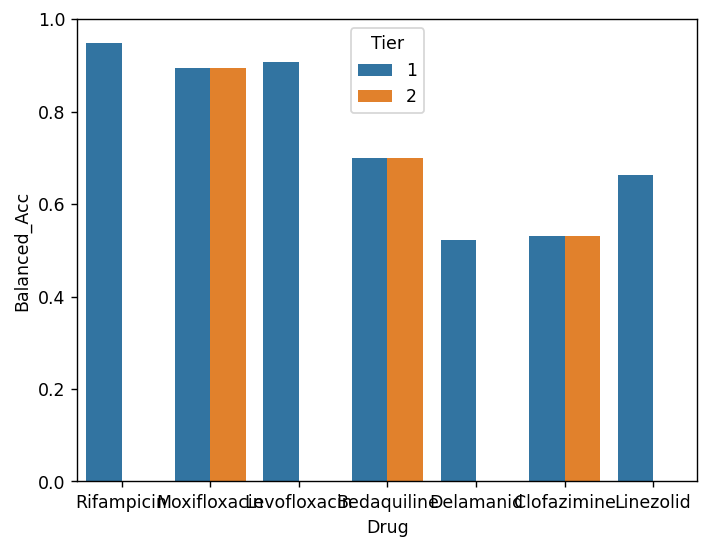

In [171]:
sns.barplot(data=dfs_lst.query("Model=='Catalog'"),
            x="Drug",
            y="Balanced_Acc",
            hue="Tier"
           )

plt.ylim(0, 1)

(0.0, 1.0)

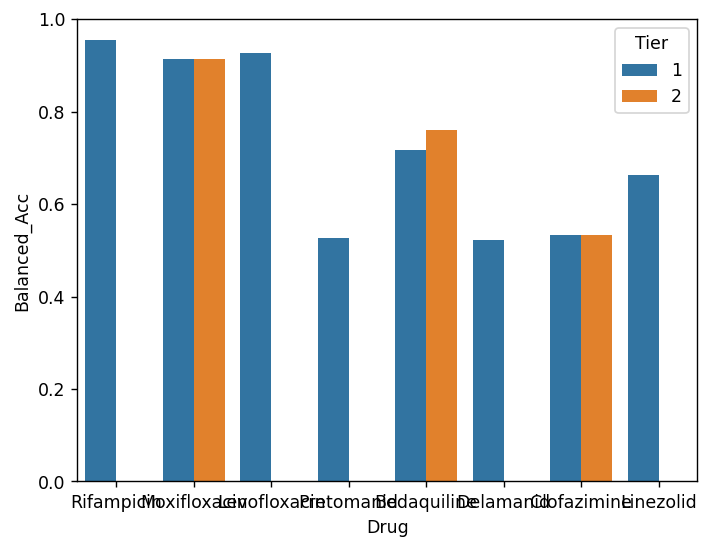

In [172]:
sns.barplot(data=dfs_lst.query("Model=='L2_Reg'"),
            x="Drug",
            y="Balanced_Acc",
            hue="Tier"
           )

plt.ylim(0, 1)

In [ ]:
cat1_mutations = results_df.query("regression_confidence == 'Assoc w R - strict' & Tier in @tiers_lst & ~mutation.str.contains('|'.join(['lof', 'inframe']))")["mutation"].values


# CC vs. CC-ATU Analyses

Export only variants that would pass the Expert rule:

<ul>
    <li>Odds Ratio > 1</li>
    <li>N_resistant (i.e. true positive) ≥ 5</li>
    <li>PPV_LB ≥ 0.25</li>
    <li>Benjamini-Hochberg p-value < 0.01</li>
</ul>

In [ ]:
# def export_cc_atu_analyses(drugs_lst, pval_thresh=0.01):
#     '''
#     This function combines the CC and CC-ATU analyses for each drug. 
#     '''
    
#     if not os.path.isdir("../results/ATU"):
#         os.mkdir("../results/ATU")
    
#     # hard coded paths to preserve the model hierarchy
#     analysis_paths = ["tiers=1/dropAF_noSyn_poolSeparate",
#                       "tiers=1/dropAF_noSyn_poolALL",
#                       "tiers=1/dropAF_noSyn_unpooled",
#                       "tiers=1+2/dropAF_noSyn_poolSeparate",
#                       "tiers=1+2/dropAF_noSyn_poolALL",
#                       "tiers=1+2/dropAF_noSyn_unpooled",
#     ]
    
#     for drug in drugs_lst:
        
#         all_analyses = {}
        
#         for i, model_path in enumerate(analysis_paths):

#             if os.path.isfile(os.path.join(analysis_dir, drug, "ATU", model_path, "model_analysis_with_stats_CC.csv")):
            
#                 cc = pd.read_csv(os.path.join(analysis_dir, drug, "ATU", model_path, "model_analysis_with_stats_CC.csv"))
#                 cc_atu = pd.read_csv(os.path.join(analysis_dir, drug, "ATU", model_path, "model_analysis_with_stats_CC_ATU.csv"))

#                 cc.loc[(cc["Odds_Ratio"] > 1) & 
#                        (cc["TP"] >= 5) &
#                        (cc["PPV_LB"] >= 0.25) & 
#                        (cc["BH_pval"] < pval_thresh), "Expert_PASS"
#                       ] = 1

#                 cc_atu.loc[(cc_atu["Odds_Ratio"] > 1) & 
#                            (cc_atu["TP"] >= 5) &
#                            (cc_atu["PPV_LB"] >= 0.25) & 
#                            (cc_atu["BH_pval"] < pval_thresh), "Expert_PASS"
#                           ] = 1

#                 cc["ATU"] = 0
#                 cc_atu["ATU"] = 1

#                 combined_df = pd.concat([cc.query("Expert_PASS == 1"), cc_atu.query("Expert_PASS == 1")])
#                 del combined_df["Expert_PASS"]
                
#                 combined_df["Tier"] = [2 if "+2" in model_path else 1][0]
#                 combined_df["Phenos"] = ["ALL" if "ALL" in model_path else "WHO"][0]
#                 combined_df["pool_type"] = model_path.split("_")[-1]
#                 combined_df["synonymous"] = int("withSyn" in model_path)
#                 combined_df["HET"] = ["DROP" if "drop" in model_path else "AF"][0]

#                 # remove principal components
#                 combined_df = combined_df.loc[~combined_df["mutation"].str.contains("PC", case=True)]
            
#                 all_analyses[f"Model_{i+1}"] = combined_df.sort_values("Odds_Ratio", ascending=False)

#         if len(all_analyses) > 0:
                
#             with pd.ExcelWriter(f"../results/ATU/{drug}.xlsx") as file:

#                 for key, val in all_analyses.items():
#                     val.to_excel(file, sheet_name=key, index=False)
                  
#             print(f"Finished {drug}!")

In [ ]:
# export_cc_atu_analyses(drugs_lst)